In [80]:
# Basic imports 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
from IPython.display import Video

# scikit-tda imports..... Install all with -> pip install scikit-tda
#--- this is the main persistence computation workhorse
import ripser
# from persim import plot_diagrams
import persim
# import persim.plot

# teaspoon imports...... Install with -> pip install teaspoon
#---these are for generating data and some drawing tools 
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw

#---these are for generating time series network examples
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
print(2)

2


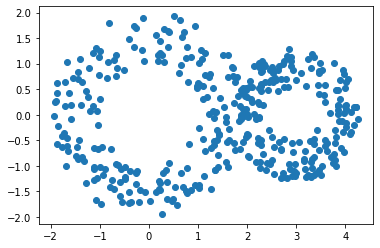

In [2]:
# Make a quick double annulus

def DoubleAnnulus(r1 = 1, R1 = 2, r2 = .8, R2 = 1.3, xshift = 3):
    P = makePtCloud.Annulus(r = r1, R = R1)
    Q = makePtCloud.Annulus(r = r2, R = R2)
    Q[:,0] = Q[:,0] + xshift
    P = np.concatenate((P, Q) )
    return(P)

P = DoubleAnnulus(r1 = 1, R1 = 2, r2 = .5, R2 = 1.3, xshift = 3) 
plt.scatter(P[:,0], P[:,1])

In [11]:
# Make three example point clouds 
r = 1
R = 2
P1 = makePtCloud.Annulus(N=200, r=r, R=R, seed=None) # teaspoon data generation
P2 = makePtCloud.Annulus(N=200, r=r, R=R, seed=None)
P2[:,1] += 6
P3 = DoubleAnnulus()
P3 *= 1.1
P3[:,0] += 6
P3[:,1] += 3
P1[:10,:10]
P1.shape
P3.shape

(400, 2)

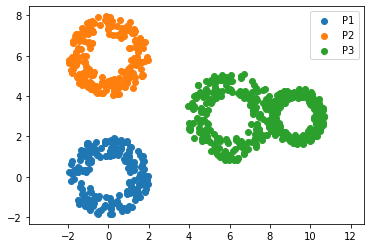

In [4]:
# plt.figure(figsize = (15,5))
plt.scatter(P1[:,0],P1[:,1], label = 'P1')
plt.scatter(P2[:,0],P2[:,1], label = 'P2')
plt.scatter(P3[:,0],P3[:,1], label = 'P3')
plt.axis('equal')
plt.legend()

[[0.47399631 0.51064086]
 [0.45040727 0.47073033]
 [0.43980291 0.44562042]
 [0.4302361  0.52420253]
 [0.42520946 0.46627471]
 [0.37183559 0.43715051]
 [0.37119797 0.43903127]
 [0.36119571 0.3643851 ]
 [0.35982978 0.48226848]
 [0.35701483 0.38056049]
 [0.35180977 0.40467012]
 [0.35117564 0.406665  ]
 [0.34977025 1.84544098]
 [0.34936354 0.46047997]
 [0.34736055 0.35358554]
 [0.34435055 0.34662753]
 [0.3426477  0.38729468]
 [0.33897716 0.45076051]
 [0.33266324 0.35723266]
 [0.3311761  0.36734536]
 [0.32199717 0.32734305]
 [0.32169008 0.37941983]
 [0.31882223 0.33928615]
 [0.31130272 0.31172055]
 [0.30280626 0.32081398]
 [0.29772145 0.34164235]
 [0.29382536 0.53948581]
 [0.29372478 0.2999945 ]
 [0.29122171 0.49002403]
 [0.2866396  0.29341456]
 [0.27730834 0.28168556]
 [0.26739657 0.30169982]
 [0.25660777 0.33650243]
 [0.25598904 0.28875205]
 [0.24450882 0.31697839]
 [0.24132518 0.36244622]
 [0.23776442 0.29040727]
 [0.23612228 0.26662582]
 [0.23439226 0.24297583]
 [0.21394382 0.22463742]


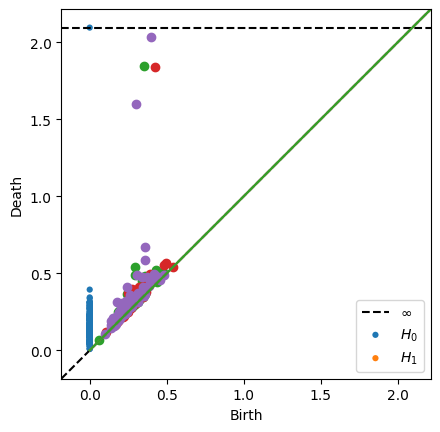

In [82]:
# Compute their diagrams 
diagrams1 = ripser.ripser(P1)['dgms']
diagrams2 = ripser.ripser(P2)['dgms']
diagrams3 = ripser.ripser(P3)['dgms']
print(diagrams1[1])
print(diagrams3[1])

persim.plot_diagrams(diagrams1) # alternative
Draw.drawDgm(diagrams1[1])
Draw.drawDgm(diagrams2[1])
Draw.drawDgm(diagrams3[1])
# Draw.drawDgm(diagrams1[0])

In [83]:
# Compute bottleneck distance using scikit-tda

# nek = persim.bottleneck(diagrams1[1], diagrams2[1], matching=True)
nek = persim.bottleneck(diagrams1[1], diagrams3[1], matching=True)
dis, arr = nek
print(dis)
# help(persim.__doc__())
# print(persim.__doc__())
import sys
sys.executable
type(persim.bottleneck)
# print(persim.bottleneck.__doc__)
print(diagrams1[0].shape, diagrams1[1].shape)

0.6494226455688477
(200, 2) (45, 2)


The bottleneck distance is 0.6494226455688477


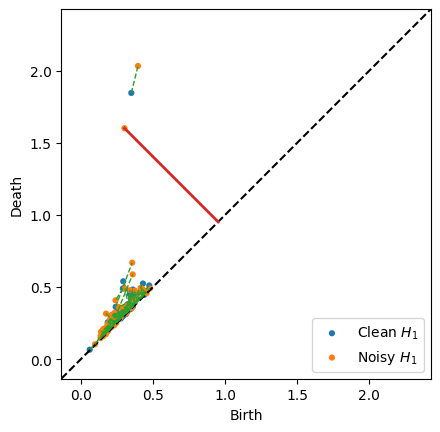

In [88]:
# Compute bottleneck of P1 and P3
distance_bottleneck, matching = persim.bottleneck(diagrams1[1], diagrams3[1], matching=True)
persim.bottleneck_matching(diagrams1[1], diagrams3[1], matching=matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
# persim.bottleneck_matching(diagrams1[1], diagrams3[1])
# persim.visuals.bottleneck_matching(diagrams1[1], diagrams3[1], matching=matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
print('The bottleneck distance is', distance_bottleneck)
# print(persim.visuals.bottleneck.__doc__)
# print(persim.visuals.bottleneck_matching.__doc__)